#📌 Extracción

##Bibliotecas a Utiliziar

In [1236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##Carga de datos JSON

###Realizar carga de datos

In [1237]:
#Importar bibliotecas para realizar carga de datos desde Api
import requests
import json
'''
Cargar información
1. Traer la información del enlace
2. Generar archivo json
3. Convertir archivo json a dataframe
'''

data_telcom=requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
data=json.loads(data_telcom.text)
df=pd.DataFrame(data)
df.head()
#Se observa que cuenta con 4 columnas a normalizar

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###Normalizar columnas

In [1238]:
# Copia del df original
'''
(Se aplica df.copy(), si no ambos apuntarán al mismo espacio de memoria)
'''
df_original = df.copy()

# Columnas a normalizar
columnas = ['customer', 'phone', 'internet', 'account']


#Normalización de cada columna de archivo JSON
'''
1. Crear una lista vacía para almacenar las columnas normalizadas
2. Recorrer cada columna con estructura JSON mediante for
3. Normalizar cada columna y almacenarla temporalmente en 'temp'
4. (Opcional) Renombrar columnas con el nombre de origen + campo
5. Agregar 'temp' a la lista columnas_normalizadas
6. Eliminar las columnas originales del DataFrame y guardar en df_base
7. Unir df_base con las columnas normalizadas para formar df_final
8. Utilizar costumerID como index
'''
columnas_normalizadas = []
for col in columnas:
    temp = pd.json_normalize(df_original[col])
    #temp.columns = [f'{col}_{subcol}' for subcol in temp.columns]
    columnas_normalizadas.append(temp)

# Mantener solo columnas no normalizadas
df_base = df_original.drop(columns=columnas)

# Unir todo: columnas base + columnas normalizadas
df_final = pd.concat([df_base] + columnas_normalizadas, axis=1)

#Cambio de index
df_final.set_index('customerID',inplace=True)
df_final.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

##Revisión de data frame


In [1239]:
#Extensión
df_final.shape
print(f'El dataframe tiene {df_final.shape[0]} filas y {df_final.shape[1]} columnas')

El dataframe tiene 7267 filas y 20 columnas


In [1240]:
#Validación de nulos
df_final.isnull().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [1241]:
#Muestra de datos

df_final.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
6357-JJPQT,No,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.50,232.35
3588-WSTTJ,No,Female,1,No,No,35,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.05,3554.6
3313-QKNKB,Yes,Male,0,Yes,No,59,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,One year,No,Electronic check,85.55,5084.65
4080-OGPJL,Yes,Female,0,No,No,8,Yes,Yes,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,71.15,563.65
6624-JDRDS,No,Female,0,No,No,6,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45


##Tipos de datos

In [1242]:
#Información de columnas
df_final.info()

'''
De acuerdo al diccionario de datos el tipo de cada columna debe ser:
customerID: object
Churn: boolean true/false
gender: object (puede ser categórica nominal)
SeniorCitizen: boolean true/false
Partner: boolean true/false
Dependents: boolean true/false
tenure: int64
PhoneService: boolean true/false
MultipleLines: boolean true/false
InternetService: object (puede ser categórica nominal)
OnlineSecurity: boolena true/false
OnlineBackup: boolena true/false
DeviceProtection: boolena true/false
TechSupport: boolena true/false
StreamingTV: boolena true/false
StreamingMovies: boolena true/false
Contract: object (puede ser categórica nominal)
PaperlessBilling: boolena true/false
PaymentMethod: object (puede ser categórica nominal)
Charges.Monthly: float64
Charges.Total: float64
'''

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null 

'\nDe acuerdo al diccionario de datos el tipo de cada columna debe ser:\ncustomerID: object\nChurn: boolean true/false\ngender: object (puede ser categórica nominal)\nSeniorCitizen: boolean true/false\nPartner: boolean true/false\nDependents: boolean true/false\ntenure: int64\nPhoneService: boolean true/false\nMultipleLines: boolean true/false\nInternetService: object (puede ser categórica nominal)\nOnlineSecurity: boolena true/false\nOnlineBackup: boolena true/false\nDeviceProtection: boolena true/false\nTechSupport: boolena true/false\nStreamingTV: boolena true/false\nStreamingMovies: boolena true/false\nContract: object (puede ser categórica nominal)\nPaperlessBilling: boolena true/false\nPaymentMethod: object (puede ser categórica nominal)\nCharges.Monthly: float64\nCharges.Total: float64\n'

In [1243]:
#Cambio de tipo variable a columnas numéricas
'''
ternure y Charges.Monthly cuentan con el tipo correcto
Se debe eliminar espacios en blanco de Charges.Total y convertir
'''
#Validar Si presenta valores vacios
#df_final[df_final['Charges.Total'] == ''].count()

validacion=df_final.query('`Charges.Total` == " "').shape[0]

print(f"La columna Charges.Total presenta {validacion} valores vacíos de tipo \" \".")


La columna Charges.Total presenta 11 valores vacíos de tipo " ".


In [1244]:
#Validación de datos vaciós en otras celdas
for col in df_final.columns:
    vacíos = df_final[col].astype(str).str.strip().eq("").sum()
    if vacíos > 0:
        print(f'La columna {col} presenta {vacíos} valores vacíos de tipo "".')



La columna Churn presenta 224 valores vacíos de tipo "".
La columna Charges.Total presenta 11 valores vacíos de tipo "".


In [1245]:
#Los valores con espacios en blanco y ningun valor se deben eliminar.
#Eliminar vacios de churn
nan_churn=df_final[df_final['Churn'].astype(str).str.strip()==""].index
df_final.drop(nan_churn,inplace=True)
#Eliminar vacios de charge.total
nan_churn=df_final[df_final['Charges.Total'].astype(str).str.strip()==""].index
df_final.drop(nan_churn,inplace=True)

In [1246]:
#Validar vacios
#Validación de datos vaciós en otras celdas
for col in df_final.columns:
    vacíos = df_final[col].astype(str).str.strip().eq("").sum()
    if vacíos > 0:
        print(f'La columna {col} presenta {vacíos} valores vacíos de tipo "".')



In [1247]:
#Tranformar datos numéricos

df_final['Charges.Total']=df_final['Charges.Total'].apply(np.float64)
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null 

##Conversión de datos boleanos a binario

In [1248]:
#Revisión de valores únicos
columnas_object = df_final.select_dtypes(include='object').columns
for col in columnas_object:
    print(f'Columna: {col}')
    print(df_final[col].unique())
'''
las columnas con 'No' 'Yes' son boleanos true/false que se transformaran a (1,0)
Así mismo, datos que tengan no service serán considerados como No
'''

Columna: Churn
['No' 'Yes']
Columna: gender
['Female' 'Male']
Columna: Partner
['Yes' 'No']
Columna: Dependents
['Yes' 'No']
Columna: PhoneService
['Yes' 'No']
Columna: MultipleLines
['No' 'Yes' 'No phone service']
Columna: InternetService
['DSL' 'Fiber optic' 'No']
Columna: OnlineSecurity
['No' 'Yes' 'No internet service']
Columna: OnlineBackup
['Yes' 'No' 'No internet service']
Columna: DeviceProtection
['No' 'Yes' 'No internet service']
Columna: TechSupport
['Yes' 'No' 'No internet service']
Columna: StreamingTV
['Yes' 'No' 'No internet service']
Columna: StreamingMovies
['No' 'Yes' 'No internet service']
Columna: Contract
['One year' 'Month-to-month' 'Two year']
Columna: PaperlessBilling
['Yes' 'No']
Columna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


"\nlas columnas con 'No' 'Yes' son boleanos true/false que se transformaran a (1,0)\nAsí mismo, datos que tengan no service serán considerados como No\n"

In [1249]:
#Reemplazar No internet service y No phone service
reemplazos = {
    'No internet service': 'No',
    'No phone service': 'No'
}

df_final.replace(reemplazos, inplace=True)
df_final.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [1250]:
#Reemplazar (Yes,No) por (1,0)
reemplazos = {
    'Yes': 1,
    'No': 0
}

df_final.replace(reemplazos, inplace=True)

#Visualizar resultados
df_final.info()
columnas_object = df_final.select_dtypes(include='object').columns
for col in columnas_object:
    print(f'Columna: {col}')
    print(df_final[col].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null 

/tmp/ipython-input-1250-1191887029.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final.replace(reemplazos, inplace=True)


In [1251]:
df_final.head()
'''
Las columnas Yes/No se han reemplazado por 1/0.
De esta manera se ha procedido a realziar el procesos de
One Hot Encoding
Queda pendiente las columnas con valores categóricos nominales.
Pero antes se guarda df visual para gráficos
'''
df_visual=df_final.copy()

In [1252]:
#One Hot Encoding columnas nominales
cols_ohe = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
df_final = pd.get_dummies(df_final, columns=cols_ohe, prefix=cols_ohe, dtype='int8')
df_final.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,9,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
0003-MKNFE,0,0,0,0,9,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
0011-IGKFF,1,1,1,0,13,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
0013-EXCHZ,1,1,1,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [1253]:
#Agregar columna para validar si pago es automático o no
df_final['PagoAutomatico'] = df_final.filter(like='PaymentMethod_').apply(
    lambda row: int(any('automatic' in col for col in row.index[row == 1])), axis=1
).astype('int8')
df_final.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PagoAutomatico
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,9,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
0003-MKNFE,0,0,0,0,9,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
0011-IGKFF,1,1,1,0,13,1,0,0,1,1,...,0,1,1,0,0,0,0,1,0,0
0013-EXCHZ,1,1,1,0,3,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [1254]:
#Información de Columnas OHE
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                           

In [1255]:
#Información de Columnas Visual
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null 

##Creación de columnas adicionales

In [1256]:
# Crear columna PagoAutomatico a partir del texto en PaymentMethod
df_visual['PagoAutomatico'] = df_visual['PaymentMethod'].str.contains('automatic', case=False).astype('int8')

#Creación de columna Cuentas diarias
df_visual['Cuentas_Diarias'] = (df_visual['Charges.Monthly'] / 30).round(2).astype(np.float64)
df_visual.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PagoAutomatico,Cuentas_Diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,...,1,1,0,One year,1,Mailed check,65.6,593.30,0,2.19
0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,0,2.00
0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,0,2.46
0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,0,3.27
0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,0,2.80


#📊 Carga y análisis

##Información descriptiva

In [1257]:
'''
Tipos de variables en df_visual

Cualitativas

Churn
Gender
SeniorCitizen
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
PagoAutomatico

Cuantitativas

tenure
Charges.Monthly
Charges.Total
'''



'\nTipos de variables en df_visual\n\nCualitativas\n\nChurn\nGender\nSeniorCitizen\nPartner\nDependents\nPhoneService\nMultipleLines\nInternetService\nOnlineSecurity\nOnlineBackup\nDeviceProtection\nTechSupport\nStreamingTV\nStreamingMovies\nContract\nPaperlessBilling\nPaymentMethod\nPagoAutomatico\n\nCuantitativas\n\ntenure\nCharges.Monthly\nCharges.Total\n'

###Variables Cualitativas

In [1258]:
cualitativas = ['Churn','gender','SeniorCitizen','Partner','Dependents','PhoneService',
                'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'Contract','PaperlessBilling','PaymentMethod','PagoAutomatico']

columnas_revisar = []

for col in cualitativas:
    print(f"\n▶ {col}")
    contador = df_visual[col].value_counts()
    contador_porcent = df_visual[col].value_counts(normalize=True).round(4)

    print("Frecuencia absoluta:")
    print(contador)

    print("Frecuencia relativa (%):")
    for categoria, valor in contador_porcent.items():
        if valor > 0.7:
            mensaje = "✅ Mayor al 70%"
            if col not in columnas_revisar:
                columnas_revisar.append(col)
        else:
            mensaje = ""
        print(f"{categoria}: {round(valor*100, 2)}% {mensaje}")

print("\n📌 Columnas que superan el 70% en alguna categoría:")
print(columnas_revisar)



▶ Churn
Frecuencia absoluta:
Churn
0    5163
1    1869
Name: count, dtype: int64
Frecuencia relativa (%):
0: 73.42% ✅ Mayor al 70%
1: 26.58% 

▶ gender
Frecuencia absoluta:
gender
Male      3549
Female    3483
Name: count, dtype: int64
Frecuencia relativa (%):
Male: 50.47% 
Female: 49.53% 

▶ SeniorCitizen
Frecuencia absoluta:
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
Frecuencia relativa (%):
0: 83.76% ✅ Mayor al 70%
1: 16.24% 

▶ Partner
Frecuencia absoluta:
Partner
0    3639
1    3393
Name: count, dtype: int64
Frecuencia relativa (%):
0: 51.75% 
1: 48.25% 

▶ Dependents
Frecuencia absoluta:
Dependents
0    4933
1    2099
Name: count, dtype: int64
Frecuencia relativa (%):
0: 70.15% ✅ Mayor al 70%
1: 29.85% 

▶ PhoneService
Frecuencia absoluta:
PhoneService
1    6352
0     680
Name: count, dtype: int64
Frecuencia relativa (%):
1: 90.33% ✅ Mayor al 70%
0: 9.67% 

▶ MultipleLines
Frecuencia absoluta:
MultipleLines
0    4065
1    2967
Name: count, dtype: int64
Frecuenci

###Variables Cuantitativas

In [1259]:
cuantitativas=['tenure','Charges.Monthly','Charges.Total','Cuentas_Diarias']

df_visual[cuantitativas].describe().round(2)

,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.00,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30,2.16
std,24.55,30.09,2266.77,1.00
min,1.00,18.25,18.80,0.61
25%,9.00,35.59,401.45,1.19
50%,29.00,70.35,1397.48,2.34
75%,55.00,89.86,3794.74,2.99
max,72.00,118.75,8684.80,3.96


##Gráficos Descriptivos

###Cantidad de Clientes por Churn

In [1260]:
#Tema genérico de Seaborn
sns.set_theme()

/tmp/ipython-input-1261-908769879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_visual, x='Churn',palette='Blues_r')


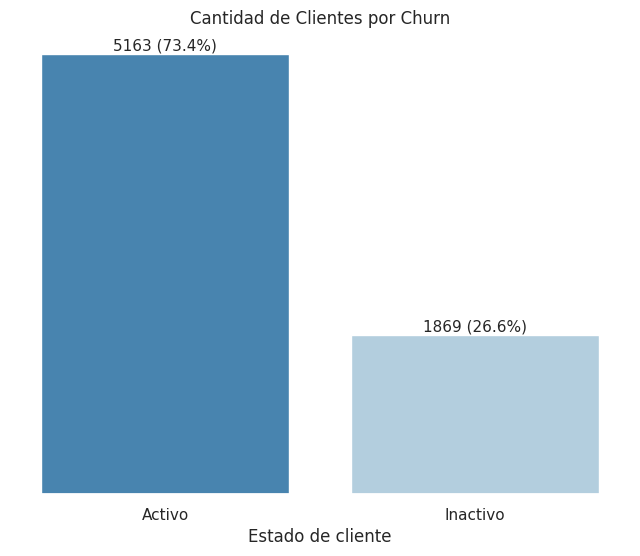

In [1261]:
#Etiqueta de datos en df_visual
df_visual['Churn'] = df_visual['Churn'].map({0: 'Activo', 1: 'Inactivo'})

#Construcción de gráfico
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df_visual, x='Churn',palette='Blues_r')
ax.set(title='Cantidad de Clientes por Churn',xlabel='Estado de cliente'
        ,ylabel='Clientes')
ax.yaxis.set_visible(False)
ax.grid(False)
ax.patch.set_alpha(0.0)
#Etiquetas
total = len(df_visual)
for categoria,valor in enumerate(df_visual['Churn'].value_counts()):
    porcentaje = 100 * valor / total
    ax.text(categoria, valor + 10, f'{valor} ({porcentaje:.1f}%)',
            ha='center', va='bottom', fontsize=11)
plt.show()


###Distribución de Churn por variables Categóricas

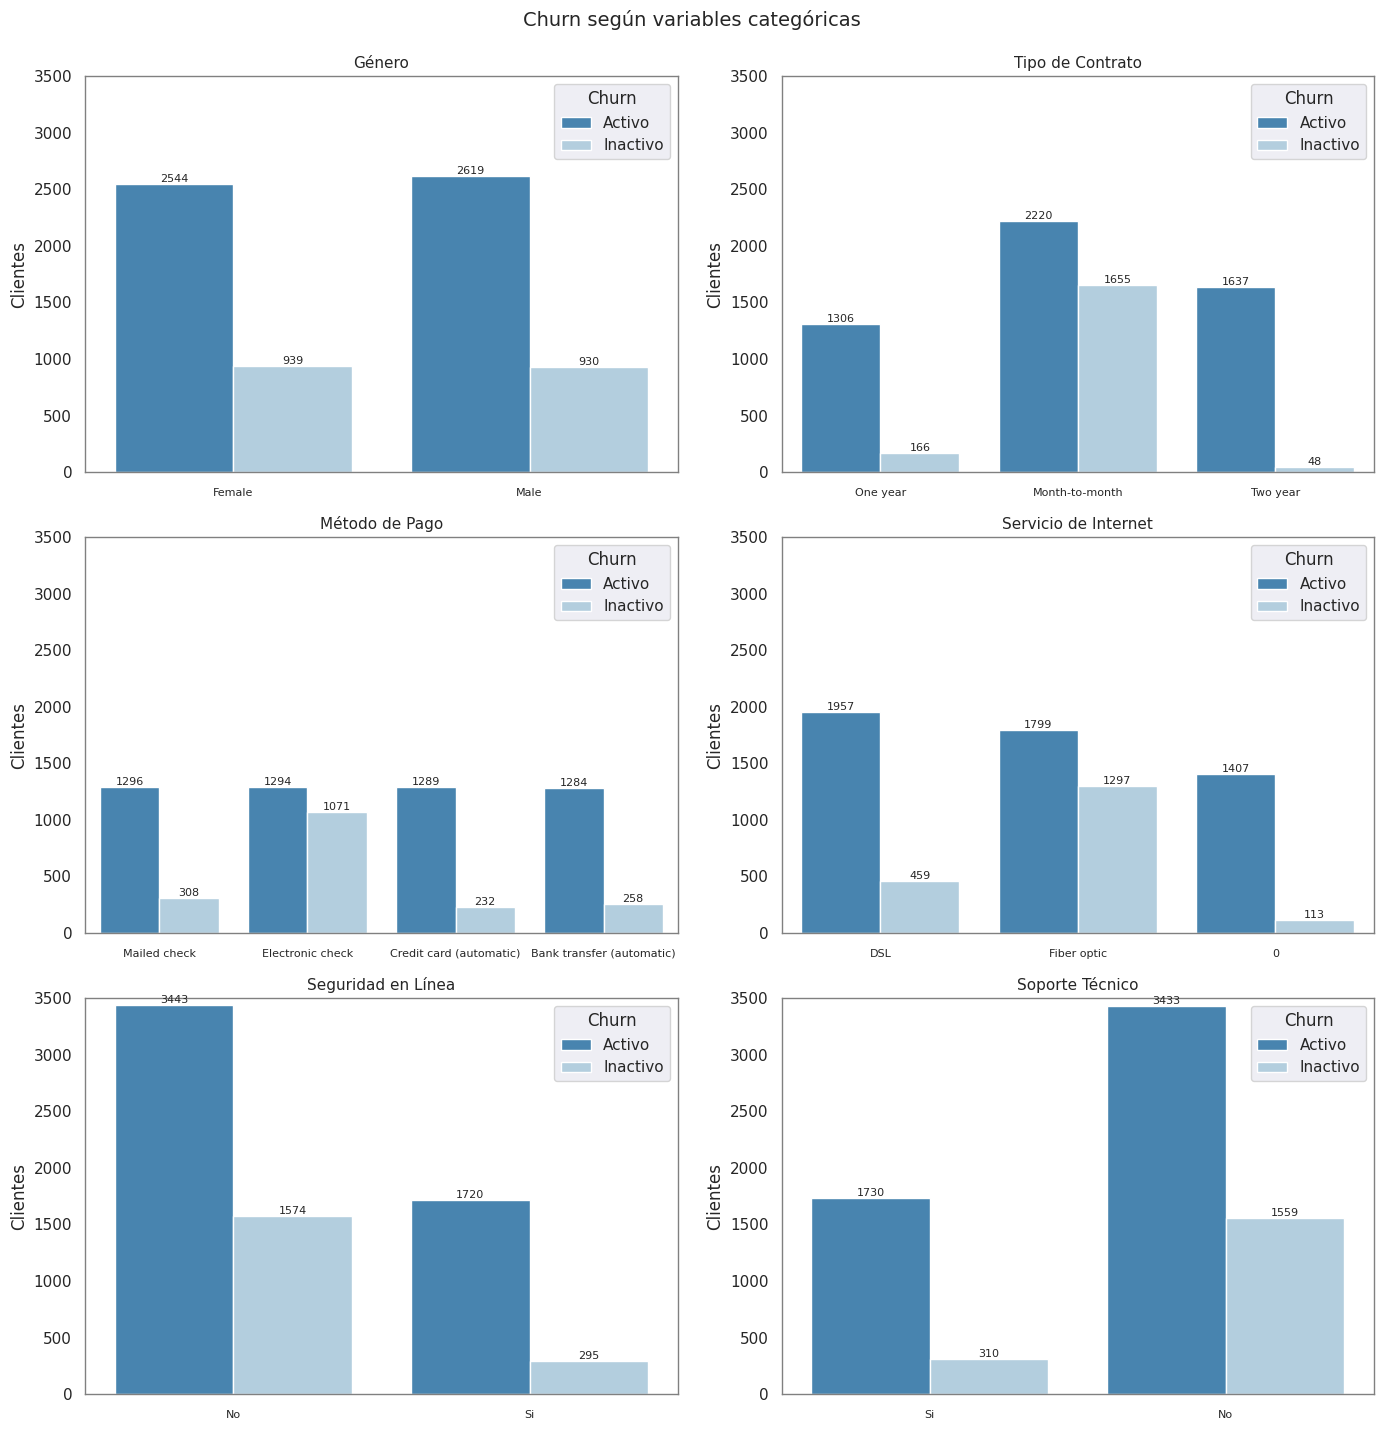

In [1262]:
# Variables categóricas a analizar
variables = ['gender', 'Contract', 'PaymentMethod', 'InternetService',
             'OnlineSecurity', 'TechSupport']

#Español
nombres_es = {
    'gender': 'Género',
    'Contract': 'Tipo de Contrato',
    'PaymentMethod': 'Método de Pago',
    'InternetService': 'Servicio de Internet',
    'OnlineSecurity': 'Seguridad en Línea',
    'TechSupport': 'Soporte Técnico'
}
#Etiqueta de datos en df_visual
df_visual['OnlineSecurity'] = df_visual['OnlineSecurity'].map({0: 'No', 1: 'Si'})
df_visual['TechSupport'] = df_visual['TechSupport'].map({0: 'No', 1: 'Si'})
# Crear figura con 3 filas y 2 columnas de subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))
axes = axes.flatten()  # Para iterar fácilmente
y_min=0
y_max=3500
# Iterar sobre variables y ejes
for i, var in enumerate(variables):
    sns.countplot(data=df_visual, x=var, hue='Churn', palette='Blues_r', ax=axes[i])
    axes[i].set_title(f'{nombres_es[var]}', fontsize=11)
    axes[i].tick_params(axis='x',labelsize=8, size=8)
    #axes[i].set_xlabel(nombres_es[var])
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Clientes')
    axes[i].grid(False)
    axes[i].patch.set_alpha(0.0)
    # Mostrar etiquetas por barra
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d', fontsize=8, label_type='edge')
    # Añadir bordes visibles a todos los lados del subplot
    for spine in ['top', 'right', 'bottom', 'left']:
        axes[i].spines[spine].set_visible(True)
        axes[i].spines[spine].set_linewidth(1)
        axes[i].spines[spine].set_color('gray')

# Ajustar espaciado
plt.tight_layout()
plt.suptitle('Churn según variables categóricas', fontsize=14, y=1.02)
plt.show()


###Distribución de Clientes por variables Cuantitativas

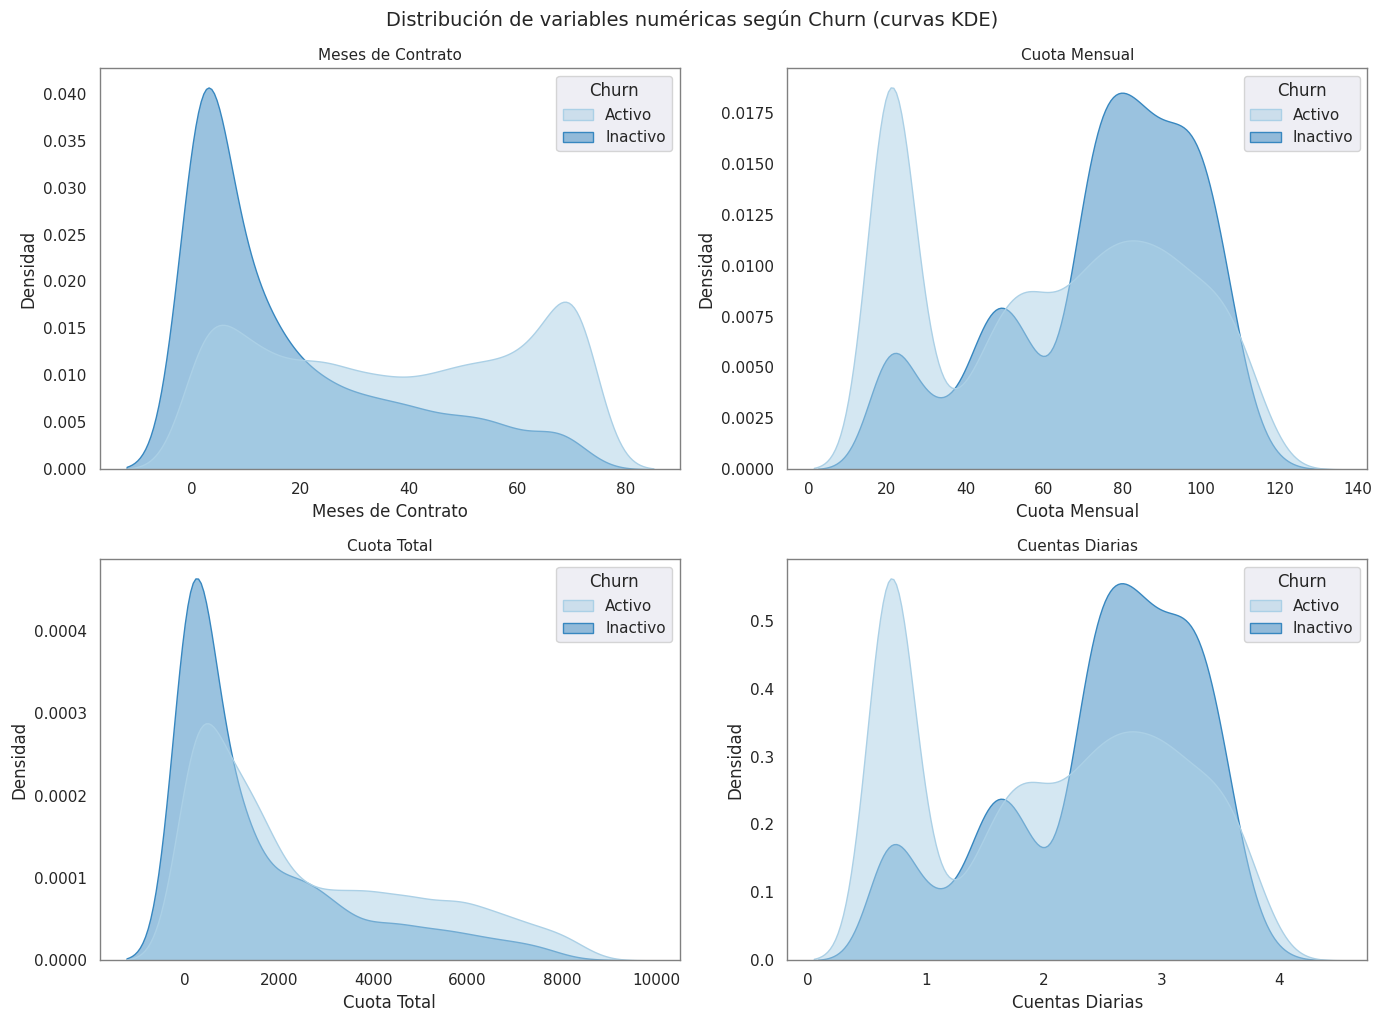

In [1269]:
#Variables Cuantitativas
variables = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

nombres_es = {
    'tenure': 'Meses de Contrato',
    'Charges.Monthly': 'Cuota Mensual',
    'Charges.Total': 'Cuota Total',
    'Cuentas_Diarias': 'Cuentas Diarias'
}

#Creación de gráfico
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

#Creación de subgráficos
for i, var in enumerate(variables):
    sns.kdeplot(
        data=df_visual, x=var, hue='Churn',
        ax=axes[i], fill=True, common_norm=False, palette='Blues', alpha=0.5
    )
    axes[i].set_title(nombres_es[var], fontsize=11)
    axes[i].set_xlabel(nombres_es[var])
    axes[i].set_ylabel('Densidad')
    axes[i].grid(False)
    axes[i].patch.set_alpha(0.0)
    # Añadir bordes visibles a todos los lados del subplot
    for spine in ['top', 'right', 'bottom', 'left']:
        axes[i].spines[spine].set_visible(True)
        axes[i].spines[spine].set_linewidth(1)
        axes[i].spines[spine].set_color('gray')
plt.tight_layout()
plt.suptitle('Distribución de variables numéricas según Churn (curvas KDE)', fontsize=14, y=1.02)
plt.show()


###Gráfico de Correlación entre variables (df_final)

In [1264]:
#Eliminar index
df_corr = df_visual.drop(columns='customerID', errors='ignore')  # si existe esa columna
#Creacción de matriz de correlación
correlation_matrix = df_corr.corr(numeric_only=True)
correlation_matrix

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,PagoAutomatico,Cuentas_Diarias
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.066663,0.059514,0.105445,0.119842,0.156258,0.219874,0.102411,-0.033775,0.219848
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.141849,0.153556,0.124483,0.118108,-0.013957,0.097825,0.319072,0.161327,0.097884
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.023639,0.013900,-0.016499,-0.038375,-0.110131,-0.112343,0.064653,0.094464,-0.112395
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.361138,0.361520,0.280264,0.285402,0.004823,0.246862,0.825880,0.396772,0.246874
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.052133,-0.070076,-0.021383,-0.033477,0.016696,0.248033,0.113008,0.001159,0.247995
MultipleLines,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.202228,0.201733,0.257804,0.259194,0.163746,0.490912,0.469042,0.113030,0.490936
OnlineBackup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,1.000000,0.303058,0.281601,0.274523,0.127056,0.441529,0.510100,0.147661,0.441511
DeviceProtection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.303058,1.000000,0.389924,0.402309,0.104079,0.482607,0.522881,0.161680,0.482563
StreamingTV,0.105445,0.124483,-0.016499,0.280264,-0.021383,0.257804,0.281601,0.389924,1.000000,0.533380,0.224241,0.629668,0.515709,0.071710,0.629668
StreamingMovies,0.119842,0.118108,-0.038375,0.285402,-0.033477,0.259194,0.274523,0.402309,0.533380,1.000000,0.211583,0.627235,0.519867,0.080873,0.627206


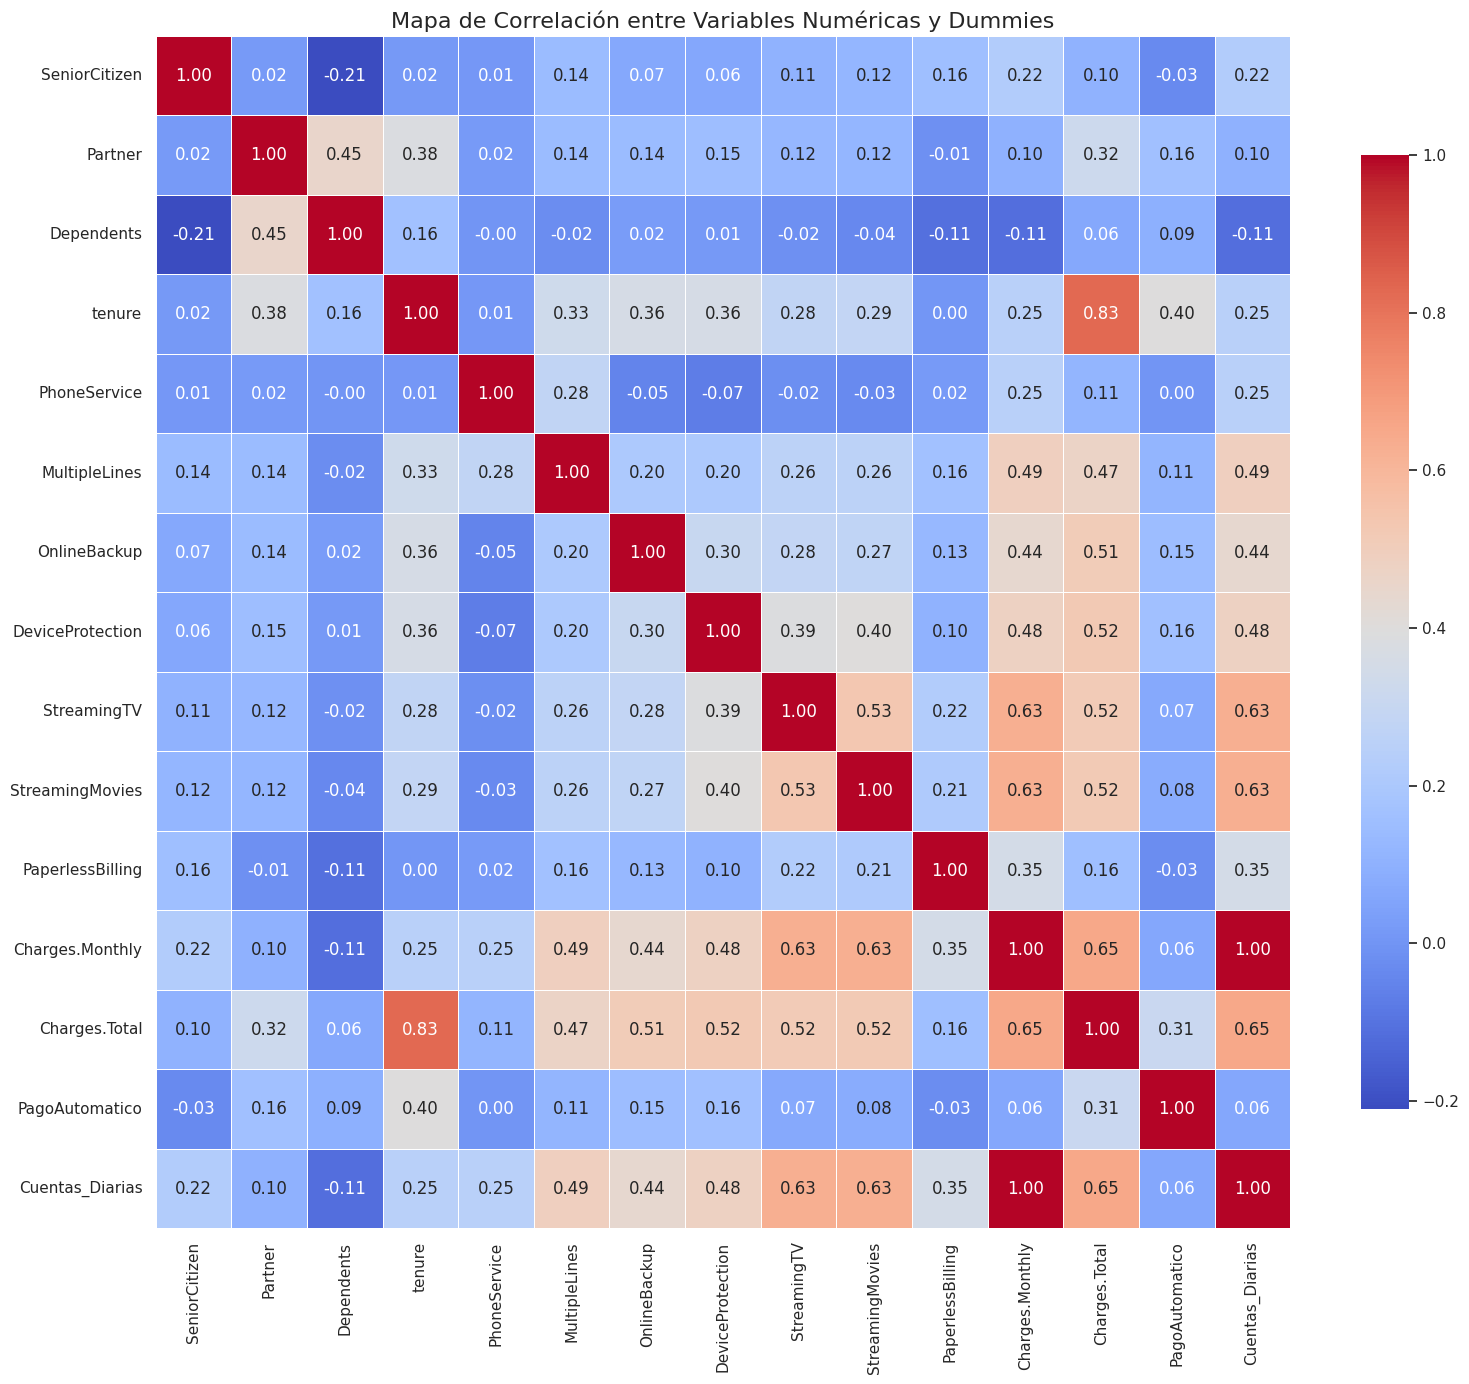

In [1265]:
# Gráfico de Matriz de Correlación entre variables
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(
    correlation_matrix,
    ax=ax,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

ax.set_title('Mapa de Correlación entre Variables Numéricas y Dummies', fontsize=16)
plt.tight_layout()
plt.show()

#📄Informe final

1.   Introducción

*   El presente informe tiene como objetivo presentar los principales hallazgos respecto al abandono de clientes Telcom en América Latina.

2.   Limpieza y Tratamiento de datos

*   Para garantizar la calidad del análisis, se realizaron los siguientes pasos de preprocesamiento:

  * Importación de datos: Se cargaron los archivos disponibles que contenían información demográfica y de servicios contratados por los clientes.

  * Corrección de tipos de datos: Se ajustaron columnas como TotalCharges, que presentaba inconsistencias de tipo string con espacios vacíos.

  * Detección y tratamiento de nulos: Se identificaron valores faltantes en campos numéricos, los cuales fueron eliminados para evitar distorsión en los análisis.

  * Transformaciones adicionales: Se crearon variables derivadas, como el mapeo binario de la columna Churn (Activo/Inactivo) y ajustes para facilitar la visualización de variables categóricas.

3.   Análisis exploratorio de datos

* El 27% (1869) de la base de datos de Clientes ya no cuentan con servicios de la compañia.
* El 43% de clientes con contrato mes a mes abandonaron la compañia.
* La compañia de internet Fiber Optic presenta la mayor prorporción de clientes inactivos: 42%.
* El 50% de clientes inactivos gastaban a lo más 1 dolar al día.
* La proporción de clientes inactivos es mayor cuando no contratan servicios adicionales
4. Conclusiones

* Existen patrones claros que permiten anticipar qué segmentos tienen mayor propensión al churn. Entre ellos destacan: contratos mensuales, servicios de fibra óptica sin servicios complementarios, y bajo nivel de gasto mensual.

* La estructura actual de datos permite una segmentación preliminar, pero se recomienda aplicar técnicas adicionales como modelos de predicción con regularización o selección de variables para evitar overfitting y mejorar la robustez del análisis.

* La correlación entre ciertas características (como falta de soporte técnico y churn) refuerza la necesidad de diseñar ofertas paquetizadas con beneficios que aumenten el valor percibido por el cliente.

